In [348]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

### Merge the match data from one year

In [349]:
match_names = ["atp_matches", "atp_matches_futures", "atp_matches_qual_chall"]
frames = []

for name in match_names:
    frames.append(pd.read_csv(f"{name}_2021.csv"))

df = pd.concat(frames)

### Clean up the data

In [350]:
## irrelevant columns
irr_cols = []
player_cols = ["df", "svpt", "1stIn", "1stWon", "2ndWon", "SvGms", "bpSaved", "bpFaced"]
general_cols = ["minutes", "score", "draw_size", "round", "loser_seed", "loser_entry", "loser_rank_points", "winner_rank_points", "winner_seed", "winner_entry", "match_num", "tourney_id", "tourney_level", "best_of"]
## add winner/loser cols
for el in player_cols:
    irr_cols.append(f"w_{el}")
    irr_cols.append(f"l_{el}")

## add the general cols
irr_cols.extend(general_cols)

## drop irrelevant cols
df.drop(columns=irr_cols, inplace=True)

## drop empty values
## NB! Might need more intricate filtering
df.dropna(axis=0, inplace=True)

df.sample(5)

,tourney_name,surface,tourney_date,winner_id,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,w_ace,l_ace,winner_rank,loser_rank
1086,Dubai,Hard,20210315,200325,Emil Ruusuvuori,R,188.0,FIN,21.952088,111442,Jordan Thompson,R,183.0,AUS,26.902122,8.0,3.0,87.0,55.0
2273,Great Ocean Road Open,Hard,20210201,122330,Alexander Bublik,R,196.0,KAZ,23.627652,106331,Christopher Oconnell,R,183.0,AUS,26.666667,23.0,9.0,45.0,121.0
913,Cincinnati Masters,Hard,20210816,128034,Hubert Hurkacz,R,196.0,POL,24.509240,104918,Andy Murray,R,190.0,GBR,34.255989,17.0,11.0,12.0,105.0
2395,Murray River Open,Hard,20210201,105173,Adrian Mannarino,L,183.0,FRA,32.594114,144707,Mikael Ymer,R,183.0,SWE,22.398357,0.0,1.0,35.0,95.0
604,Indian Wells Masters,Hard,20211004,111815,Cameron Norrie,L,188.0,GBR,26.116359,126205,Tommy Paul,R,185.0,USA,24.383299,6.0,2.0,26.0,60.0


### Convert numerical values to floats

In [355]:
numeric_cols = ["winner_rank", "loser_rank", "winner_age", "loser_age", "winner_ht", "loser_ht"]
df[numeric_cols] = df[numeric_cols].astype(float)

### Visualize data

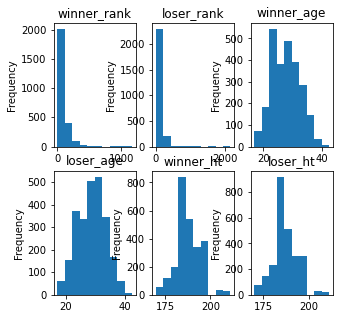

In [360]:
cols = ["winner_rank", "loser_rank", "winner_age", "loser_age", "winner_ht", "loser_ht"]

plt.figure(1, figsize=(5, 5))

for i in range(6):
    plt.subplot(2, 3, i + 1)
    df[cols[i]].plot(kind="hist", title=cols[i])

# plt.ylim([0, 10])
# plt.xlim([0, 10])
plt.show()